In [1]:
import pandas as pd
import datetime
import heatindex_calc

In [2]:
Latitude = 15.7241
Longitude = 100.3972

In [3]:
lat = Latitude
lon = Longitude
lat_str = str(lat)
lon_str = str(lon)

# plot time series

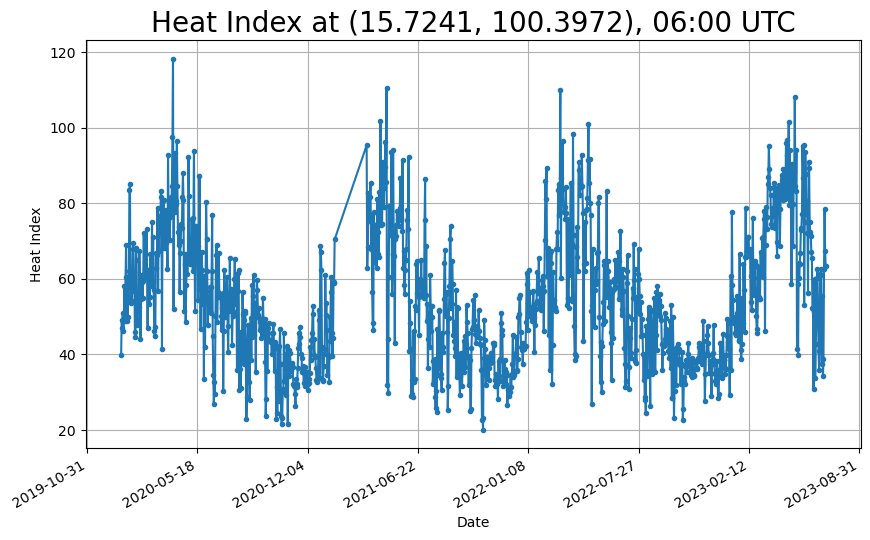

In [4]:
ds, y = heatindex_calc.plot(lat,lon)

# plot prediction

In [5]:
# start_date = '2020-01-01'
# end_date = '2023-07-01'

start_date_training = '2020-01-01'
end_date_training = '2023-04-30'

start_date_testing = '2023-05-01'
end_date_testing = '2023-07-01'


predict_days = 365

In [12]:
training_df

,ds,y
0,2020-01-01,39.93
1,2020-01-02,49.06
2,2020-01-03,46.97
3,2020-01-04,50.87
4,2020-01-05,46.32
...,...,...
1153,2023-04-26,79.49
1154,2023-04-27,94.00
1155,2023-04-28,85.49
1156,2023-04-29,80.11


11:29:58 - cmdstanpy - INFO - Chain [1] start processing
11:29:58 - cmdstanpy - INFO - Chain [1] done processing


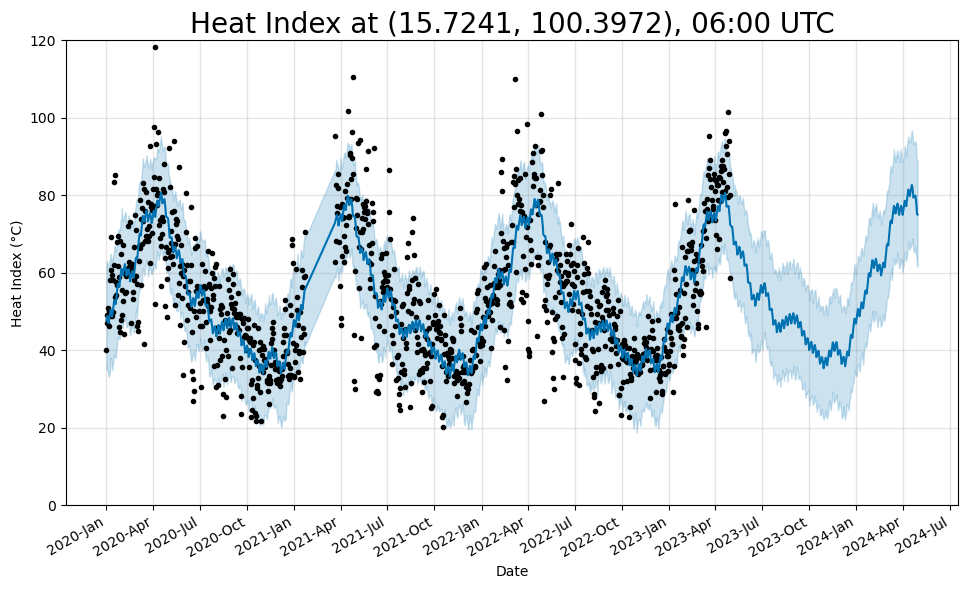

In [6]:
forecast_df, training_df, testing_df = heatindex_calc.predict(lat, lon, start_date_training, end_date_training, start_date_testing, end_date_testing, predict_days)

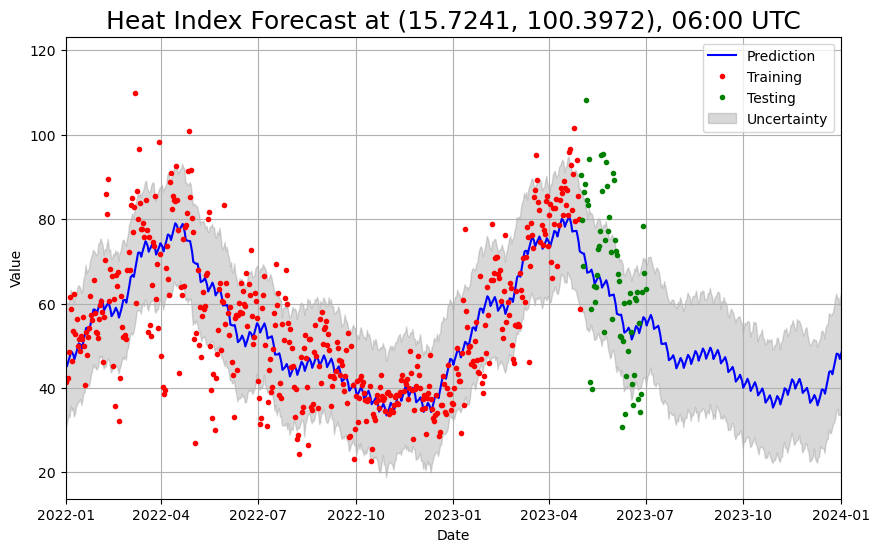

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['ds'], forecast_df['yhat'], color='blue', label='Prediction')

plt.plot(training_df['ds'], training_df['y'], color='red', marker='.', linestyle='', label='Training')
plt.plot(testing_df['ds'], testing_df['y'], color='green', marker='.', linestyle='', label='Testing')

plt.fill_between(forecast_df['ds'], forecast_df['yhat_lower'], forecast_df['yhat_upper'],
                 color='gray', alpha=0.3, label='Uncertainty')

# Setting x-axis label, y-axis label, and plot title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'Heat Index Forecast at ({lat_str}, {lon_str}), 06:00 UTC', fontsize=18)

start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2024-01-01')
plt.xlim(start_date, end_date)

# Adding legend and grid
plt.legend()
plt.grid(True)

#plt.savefig('heatindex_predict_testing_cm.png', dpi=200, bbox_inches='tight')
#plt.savefig('heatindex_predict_training_cm.png', dpi=200, bbox_inches='tight')

# Display the plot
plt.show()


In [8]:
filtered_df = forecast_df[(forecast_df['ds'] >= start_date_testing) & (forecast_df['ds'] <= end_date_testing)]

In [9]:
import numpy as np
import pandas as pd


lower_bounds = filtered_df['yhat_lower'].values
upper_bounds = filtered_df['yhat_upper'].values

count_points_between_bounds = []

# Loop through each row in 'testing_df' and count points between bounds
for y_value in testing_df['y']:
    count = int(any((y_value >= lower_bounds) & (y_value <= upper_bounds)))
    count_points_between_bounds.append(count)

total_hit = sum(count_points_between_bounds)
total_count = len(lower_bounds)
accuracy = total_hit*100.0/total_count
print(accuracy)

77.41935483870968


In [10]:
np.mean(filtered_df['yhat']-testing_df['y'])

-5.232921389995819

In [11]:
np.std(filtered_df['yhat']-testing_df['y'])

15.204941708353262